<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/bgsedsc_0.jpg">
$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\bu}{\boldsymbol{u}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

## Customer Churn Analysis and Classification

With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

You are given a dataset: each row represents a customer and each column contains attributes related to customer as described:

+ Churn (target): 1 if customer cancelled service, 0 if not
+ AccountWeeks: number of weeks customer has had active account
+ ContractRenewal: 1 if customer recently renewed contract, 0 if not
+ DataPlan: 1 if customer has data plan, 0 if not
+ DataUsage: gigabytes of monthly data usage
+ CustServCalls: number of calls into customer service
+ DayMins: average daytime minutes per month
+ DayCalls: average number of daytime calls
+ MonthlyCharge: average monthly bill
+ OverageFee: largest overage fee in last 12 months
+ RoamMins: average number of roaming minutes


You are asked to **develop an algorithm** to be able to assess which are the customers that have the highest probability to churn. Besides that you will be asked to answer the 3 following questions:

1. **What variables are contributing to customer churn?** 
2. **Who are the customers more likely to churn?**
3. **What actions can be taken to stop them from leaving?**


You can follow those **steps** in your first implementation:
1. *Explore* and understand the dataset. 
2. Create extra variables if needed/possible
3. *Build* your model and test it on the same input data
4. Assess expected accuracy using *cross-validation*
5. Tune the hyperparameters of your model
6. Repeat steps 4 and 5 until you find the best model possible
7. Answer the questions asked

## Main criteria for grading
+ Algorithm implemented
+ AUC score given
+ At least Random Forest and Xgboost are used
+ Data preparation and exploration
+ Hyperparameter optimization 
+ Cross-validation used
+ Code is combined with neat and understandable commentary, with some titles and comments 

## Summary of activies

We run a X models to 

The dataset delivered didn't had NAs, so no assumptions regarding the data processing were made. We created some features that are going to be explained later on, but we didn't opt for create a lot of features like was made in the previous assignment, since for tree-based models this is not the best option. To prove this point we tested the performance of the models with 

After that, we realize the hyperparameter optimization 

Finally, we answered the questions proposed. We'll detail later and show how we got into this conclusion, but the (XXXX - name of the feature) and (XXXX - feature) are the 

We used the CatBoost encoder that help the balance between classes, because otherwise our model wouldn't be trained well to predict the churn, since approximately only 15% of the data is a churn costumer.

In [6]:
import pandas as pd
#import shap as shap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import plotly.express as px
from sklearn import metrics
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
from pymatch.Matcher import Matcher
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [7]:
df = pd.read_csv('churn_data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### Exploration of Churn dataset

visualization of Churn dataset- histogram by variable:


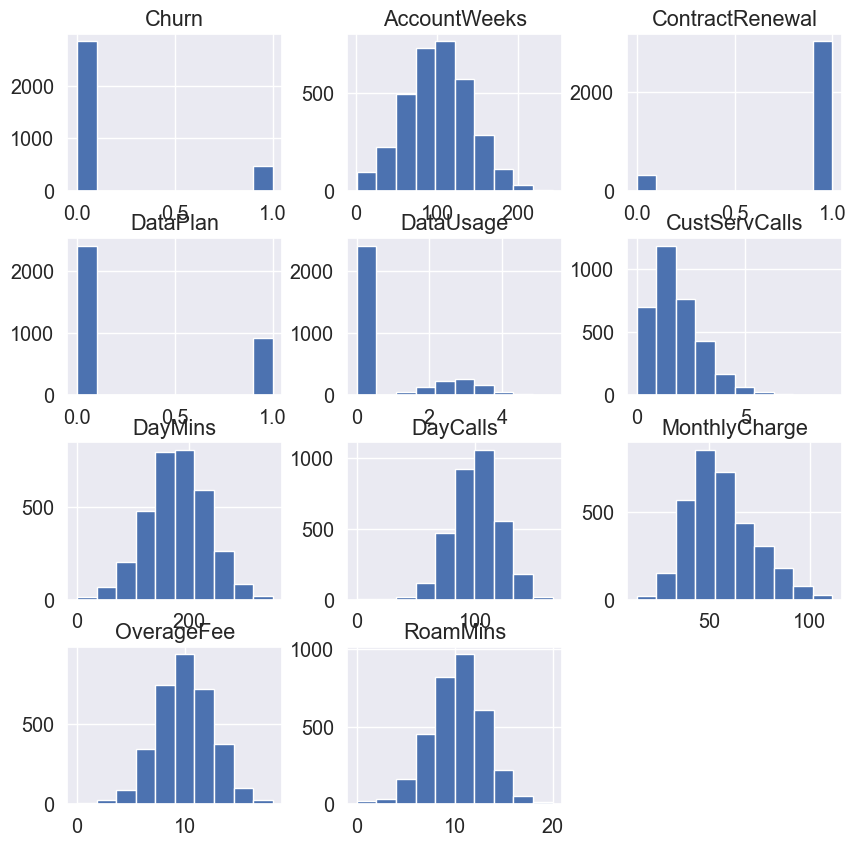

In [3]:
print('visualization of Churn dataset- histogram by variable:')
histogram1 = df.hist(figsize=(10,10))

**Initial observations:**
- Most of the Churns are 0 (makes sense, since most people don't leave their contract in a given month)
- Most of the variables are numerical, some are binary
- Most of the variables resemble a normal distribution
- CustServCalls, MonthlyCharge are skewed to the right
- DataUsage is a bit confusing, it seems like there is a group of users who don't use any data, and then a normal distribution of people who do? I guess that means DataUsage only applies to users where DataPlan == 1

In [4]:
#histogram by color by Churn
for col in df.columns:
    fig1 = px.histogram(df, x=col, color='Churn')
    fig1.show()

**Initial Observations**
- Most users who churn don't have a data plan (400 vs 80)
- The majority of users to who chrun don't have a data plan.
- It looks like most users who Churn have a higher than average MonthlyCharge

### Feature creation

The feature creation is one of the tools we have to improve the accuracy of our model. Differently of the models that automatically select the best features, simply adding features like generation of dummies and interaction terms it's not the best solution, since the model could get confused with useless features.


In the first part, to prove our point we did simulations with a lot of random interaction terms and tested the model with these features. 
Here we will generate polynomials, and add the ones considered most important by a random forest model in predicting churn. We output the AUC score for each set of features.

In the second part we are going to create features that we judge they are valuable features, adding information that we think we will help the classification of the model, based on our expertise.

In [38]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel

#define X and y
X = df.iloc[:,1:]
y = df.iloc[:,0] 


for d in [1,2,3]:
    #generate a dataset of polynomials
    poly = PolynomialFeatures(interaction_only=True, include_bias=False, degree=d)
    X_poly = poly.fit_transform(X)
    X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

    if d != 1:
        sel = SelectFromModel(RandomForestClassifier())
        
        sel.fit(X_poly, y)

        #get the columns that were most useful in prediction
        selected_feat= X_poly.columns[(sel.get_support())]
        X_poly = X_poly[selected_feat]

    #Evaluate model performance based on selected_features:
    rf = RandomForestClassifier()
 
    scores = cross_val_score(rf, X_poly, y, cv=5, scoring="roc_auc")

    # Evaluate ROC_AUC
    print("From generating dataset of interaction terms with degree %d, ROC AUC = %0.2f with a standard deviation of %0.2f" % (d, scores.mean(), scores.std()))

From generating dataset of interaction terms with degree 1, ROC AUC = 0.89 with a standard deviation of 0.02
From generating dataset of interaction terms with degree 2, ROC AUC = 0.89 with a standard deviation of 0.02
From generating dataset of interaction terms with degree 3, ROC AUC = 0.90 with a standard deviation of 0.03


Our first thought was to generate a lot of polynomial features but as shown above, this doesn't help the AUC performance for the Random Forest model. then after reading [this post on stack exchange](https://stats.stackexchange.com/questions/300254/does-feature-engineering-matter-when-doing-random-forest-or-gradient-boosting), one of the main intutitions was that "additional features and/or poorly engineered features increase the likelihood that you're training your model on noise rather than signal. Hence using domain knowledge or inspection of the data to suggest alternative ways to engineer features will usually improve results." Based on this, we'll read a bit more about churn before generating more features.

Churn, as defined above, is whether or not a customer opts out of a phone plan. Another way to think about it is that churn is a result of customer satisfaction. If a customer is happy- the utility they gain from staying is greater than the cost of staying with a mobile provider, the customer will stay. If the customer is unhappy- their utility is less than the cost of staying, they'll leave.

Understanding what goes into customer satistfaction can help us to create features to predict churn. In that sense, we are going to start now the procedure that create features that make sense.




#### Feature_1 - Complainers costumers
We are assuming that CustServCalls is a variable that reflects the number of calls to the customer service to complain about the product.
We looked into the data by df['CustServCalls'].describe() and see that 75% of the people called 2 times, so we created a varible called 'CustServcalls_groups' that splits the in two groups, the complainers (people who called 2 or more times to the custumer service, assigned 1) and the non-complainers (assigned 0)

In [18]:
# Feature_1 - Complainers costumers

df['CustServCalls_groups'] = np.where(df['CustServCalls'] < 2, 0,
                               np.where(df['CustServCalls'] >= 2, 1, 0))

We based our feature creation in these assumptions:

What makes a happy customer:
- Uses phone plan.
- Phone plan perks meet the needs of the customer (customer doesn't pay for extra stuff, and doesn't need more than he/she has)
- Monetary cost is low relative to the benefit derived from phone plan

What makes an unhappy customer:
- Doesn't use it
- Pays for extra stuff or feels like the plan doesn't meet his/her needs
- Monetary cost is expensive relative to benefit derived from plan

### Prepare df for models

In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

            Hyperparameter Function for best estimator

In [20]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

def estimator(clf, params, X_train, y_train):

    model = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 10, 
                               cv = 4, verbose = False, random_state= 101, n_jobs = -1)
    model.fit(X_train,y_train)


    return model.best_estimator_

## Random Forest

In [35]:
# Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier()
 
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ROC AUC: 0.89 with a standard deviation of 0.03


In [37]:

params_rf = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

model = estimator(RandomForestClassifier(),params_rf, X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

KeyboardInterrupt: 

## XGBoost

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=9, objective="reg:squarederror", random_state=1)

scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#I thought XGBoost was supposed to be really good, surprised it performed worse than random forest. Maybe changing the parameters (hyperparameter optimization) would lead to better AUC score

ROC AUC: 0.85 with a standard deviation of 0.03


In [24]:

params_xg = {'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}


model = estimator(xgb.XGBClassifier(),params_xg, X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ROC AUC: 0.87 with a standard deviation of 0.03


## AdaBoost

In [25]:
ada_model = AdaBoostClassifier(n_estimators=100)

# Fit ada to the training set
ada_model.fit(X_train, y_train)
 
# Compute the probabilities of obtaining the positive class
y_pred_ada = ada_model.predict(X_test)

scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ROC AUC: 0.85 with a standard deviation of 0.04


In [26]:
params_ada = {'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model = estimator(AdaBoostClassifier(),params_ada, X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ROC AUC: 0.85 with a standard deviation of 0.04
ROC AUC: 0.84 with a standard deviation of 0.05


## CatBoost

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cat_model = CatBoostClassifier(verbose = False)
cat_model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = cat_model.predict(X_test)

print(metrics.confusion_matrix(expected_y, predicted_y))

scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[[844  11]
 [ 50  95]]
ROC AUC: 0.89 with a standard deviation of 0.03


In [28]:
params_cat = {'num_trees': list(np.linspace(151, 1200, 10, dtype = int))}
               
model = estimator(CatBoostClassifier(),params_cat, X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

# Evaluate ROC_AUC
print("ROC AUC: %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Learning rate set to 0.074061
Learning rate set to 0.074043
Learning rate set to 0.074061
Learning rate set to 0.074061
Learning rate set to 0.043903
Learning rate set to 0.043914
Learning rate set to 0.043914
Learning rate set to 0.043914
0:	learn: 0.6546384	total: 56.4ms	remaining: 8.46s
0:	learn: 0.6499498	total: 58.1ms	remaining: 8.71s
0:	learn: 0.6620839	total: 57.6ms	remaining: 15.3s
0:	learn: 0.6492308	total: 59.7ms	remaining: 8.96s
0:	learn: 0.6489105	total: 58.8ms	remaining: 8.83s
1:	learn: 0.6148939	total: 61.8ms	remaining: 4.6s
1:	learn: 0.6139753	total: 63.1ms	remaining: 4.7s
0:	learn: 0.6494697	total: 58.8ms	remaining: 15.7s
1:	learn: 0.6133059	total: 62.4ms	remaining: 4.64s
1:	learn: 0.6216884	total: 63.3ms	remaining: 8.39s
2:	learn: 0.5800210	total: 64.8ms	remaining: 3.2s
0:	learn: 0.6483960	total: 58.3ms	remaining: 15.5s
0:	learn: 0.6498628	total: 59.8ms	remaining: 15.9s
2:	learn: 0.5833319	total: 66.2ms	remaining: 3.27s
2:	learn: 0.5801395	total: 65.2ms	remaining: 3.22

### Feature Importance

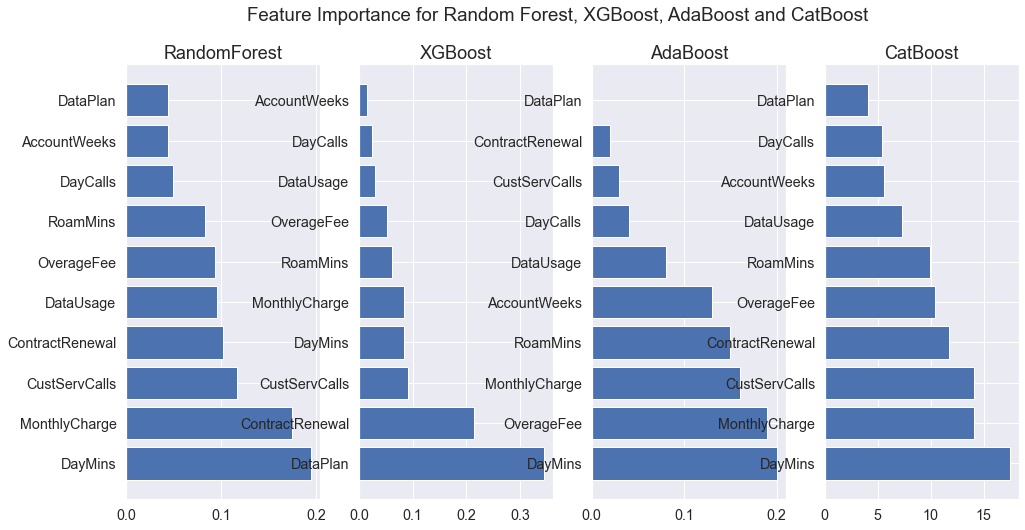

In [29]:
#DF of Feature importance for random forest
rf_feature_importance = pd.DataFrame(rf.fit(X_train, y_train).feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

#DF of Feature importance for XGBoost
xgb_feature_importance = pd.DataFrame(xgb_model.fit(X_train, y_train).feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

#DF of Feature importance for AdaBoost
ada_feature_importance = pd.DataFrame(ada_model.fit(X_train, y_train).feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

#DF of Feature importance for CatBoost
cat_feature_importance = pd.DataFrame(cat_model.fit(X_train, y_train).feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

#plot results of feature importance
fig, axes = plt.subplots(1, 4, figsize=(16,8))
axes[0].barh(rf_feature_importance.index, rf_feature_importance.Importance)
axes[1].barh(xgb_feature_importance.index, xgb_feature_importance.Importance)
axes[2].barh(ada_feature_importance.index, ada_feature_importance.Importance)
axes[3].barh(cat_feature_importance.index, cat_feature_importance.Importance)
axes[0].set_title('RandomForest', fontsize=18)
axes[1].set_title('XGBoost', fontsize=18)
axes[2].set_title('AdaBoost', fontsize=18)
axes[3].set_title('CatBoost', fontsize=18)
fig.suptitle('Feature Importance for Random Forest, XGBoost, AdaBoost and CatBoost')
plt.show()



## Confusion Matrix

### Random Forest

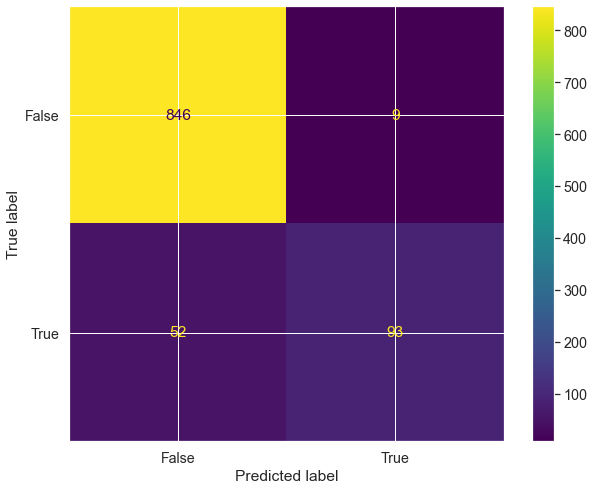

In [30]:
# generating confusion matrix - comparing actual, predicted
observed = y_test
predicted = rf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(observed, predicted)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### XGBoost

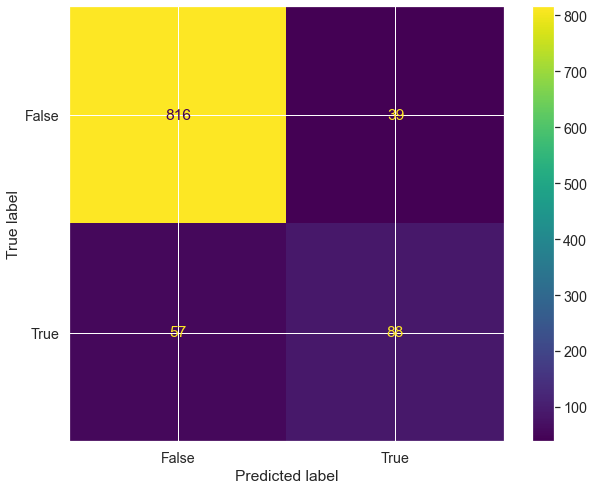

In [31]:
# generating confusion matrix - comparing actual, predicted
observed = y_test
predicted = xgb_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(observed, predicted)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### AdaBoost

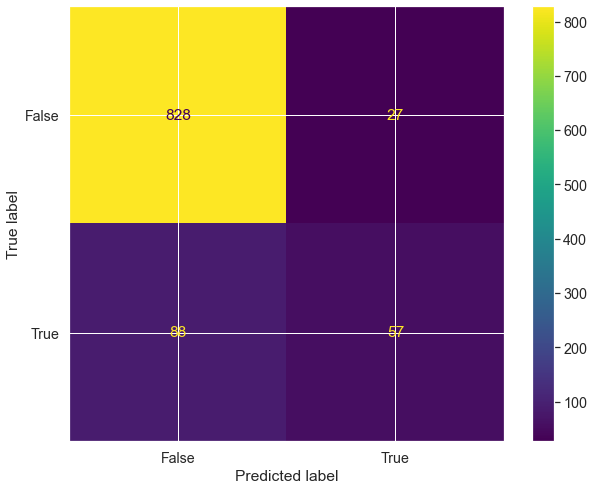

In [32]:
# generating confusion matrix - comparing actual, predicted
observed = y_test
predicted = ada_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(observed, predicted)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### CatBoost

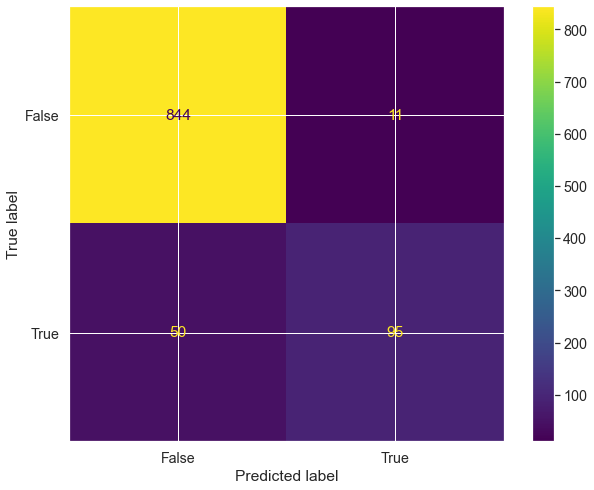

In [33]:
# generating confusion matrix - comparing actual, predicted
observed = y_test
predicted = cat_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(observed, predicted)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### **Who are the customers more likely to churn?**

To answer this question, we can use sklearn's predict_proba function to output the probability that a given observation will churn or not.

In [53]:
rf = RandomForestClassifier(max_depth=9, random_state=0)
 
rf.fit(X_train, y_train)
log_predictions = pd.DataFrame(rf.predict_log_proba(X_test),columns=['LogPr0','LogPr1'])
predictions = pd.DataFrame(rf.predict_proba(X_test),columns=['Pr0','Pr1'])


In [55]:
fig1 = px.box(predictions,  x=y_test, y="Pr1", color=y_test, title="Probability that a customer churns", labels={
                     "x": "Churn"})
fig1.show()

When we plot the predictions, we get a lot of predicted probabilities really close to zero from the Churn==0 class. We can also plot the log probabilities to better visualize the distribution. 

We can also see here that in general, the model is more likely to predict a false negative (predict a low probability when Churn is 1) than a false positive (predict a high probability when Churn is 0).

In [56]:
fig1 = px.box(log_predictions,  x=y_test, y="LogPr1", color=y_test, title="Log Probability that a customer churns", labels={
                     "x": "Churn"})
fig1.show()

To understand the differences between customers, we create 3 categories, categorizing customers based on their probabilities of churning. We can think of Customers as falling into one of three categories:

- Happy customer (unlikely to Churn), Pr Churn == 1 < .33
- Indifferent customer (may or may not Churn), Pr Churn == 1 > .33 & < .66
- Unhappy customer (likely to Churn), Pr Churn == 1 > .66

We categorize then compute the means of each category for each variable.


In [63]:
#categorize
bins = np.linspace(0, 1, 4)
digitized = np.digitize(predictions.Pr1, bins)

In [65]:
#group by and compute means
X_test.groupby(by=digitized).mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1,99.847851,0.921022,0.298490,0.856481,1.455285,173.616376,100.512195,55.490476,9.962265,10.213124
2,97.476190,0.698413,0.333333,1.018095,2.492063,214.073016,99.968254,65.546032,10.878889,10.282540
3,99.302632,0.802632,0.078947,0.343816,2.802632,211.482895,101.855263,57.359211,10.255921,10.903947


Above are the means between groups for each variable. Group 1 are less likely, group 2 are more likely, and group 3 are most likely to churn.

### **What actions can be taken to stop them from leaving?**

To answer this question, we take a subset of the sample. We can think of Customers as falling into one of three categories:
- Happy customer (unlikely to Churn)
- Indifferent customer (may or may not Churn)
- Unhappy customer (likely to Churn)

We will examine the indifferent and unhappy customers, since those are the ones that have a mid-high probability of leaving. We will define this subset as custmers with a log probability greater than the upper limit of the third quartile range.

To understand the differences between those that actually leave and don't leave, we will use a Ridge model to predict Churn for this subset, as Ridge is more easily interpretable than a RandomForest or XGboost model.

Our method to answer this question is as follows:
- Take the subset of customers that have a mid-high probabiility of leaving
- Create polynomials to look at interactions
- Scale the data
- Fit to ridge model
- Transform the beta coefficients to original scale
- Use the coefficients to understand what actions can be taken

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
import plotly.express as px

#get the customers who are 'mid-high' probability of leaving
mid_high = (log_predictions.LogPr1 > -2.7776) #& (log_predictions.LogPr1 < -1.218)

X_mid = X_test.reset_index(drop=True)[mid_high]
y_mid = y_test.reset_index(drop=True)[mid_high]

In [67]:
#generate interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False, degree=2)
X_poly = poly.fit_transform(X_mid)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

#scale the dataa
scalerX = StandardScaler().fit(X_poly)
X_scaled = scalerX.transform(X_poly)
X_scaled = pd.DataFrame(X_scaled, columns=scalerX.get_feature_names_out())

#fit Ridge model
ridge = RidgeClassifier()
ridge.fit(X_scaled, y_mid)

RidgeClassifier()

In [70]:
#get the coefficients of the fitted ridge model
coefs = pd.DataFrame(data=np.transpose(ridge.coef_), columns=['coef'], index = X_poly.columns)
coefs['importance'] = abs(coefs.coef)
coefs.sort_values(by='importance', ascending=False, inplace=True)

#get the first 10
coefs = coefs.head(10)

In [71]:
px.bar(coefs, x=coefs.index, y='coef', title='Largest coefficients for Ridge model')

Based on this model, when someone has a higher probability of leaving:
- When the number of CustServCalls increases, the likelihood of Churn does as well. This is likely more correlation than causation (people who spend more time talking to customer service are probably unhappy). Maybe they could:
    - Ask people who are on the phone to rate the quality of service. Understand the difference between Churn outcomes for those with positive customer service experiences and negative experiences.
    - If positive customer service calls lead to lower churn rates, focus on improving the quality of their customer service
